# 1. Introduction 👋

<center><img src="https://images.unsplash.com/photo-1553729459-efe14ef6055d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=2070&q=80" alt="Loan Picture" width="600" height="600"></center><br>

## Data Set Problems 🤔

👉 The company seeks **to automate (in real time) the loan qualifying procedure** based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in **accelerating decision-making process** for determining whether an applicant is eligible for a loan or not.

---

## Objectives of Notebook 📌
👉 **This notebook aims to:**
*   Analyze customer data provided in data set (EDA)
*   Build various ML models that can predict loan approval

👨‍💻 **The machine learning models used in this project are:**
1. Logistic Regression
2. K-Nearest Neighbour (KNN)
3. Support Vector Machine (SVM)
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boost

---

## Data Set Description 🧾
👉 There are **13 variables** in this data set:
*   **8 categorical** variables,
*   **4 continuous** variables, and
*   **1** variable to accommodate the loan ID.

<br>

👉 The following is the **structure of the data set**.


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Loan_ID</b></td>
<td>Loan reference number <br> (unique ID)</td>
<td>LP001002; LP001003; ...</td>
</tr>
<tr>
<td><b>Gender</b></td>
<td>Applicant gender <br> (Male or Female)</td>
<td>Male; Female</td>
</tr>
<tr>
<td><b>Married</b></td>
<td>Applicant marital status <br> (Married or not married)</td>
<td>Married; Not Married</td>
</tr>
<tr>
<td><b>Dependents</b></td>
<td>Number of family members</td>
<td>0; 1; 2; 3+</td>
</tr>
<tr>
<td><b>Education</b></td>
<td>Applicant education/qualification <br> (graduate or not graduate)</td>
<td>Graduate; Under Graduate</td>
</tr>
<tr>
<td><b>Self_Employed</b></td>
<td>Applicant employment status <br> (yes for self-employed, no for employed/others)</td>
<td>Yes; No</td>
</tr>
<tr>
<td><b>ApplicantIncome</b></td>
<td>Applicant's monthly salary/income</td>
<td>5849; 4583; ...</td>
</tr>
<tr>
<td><b>CoapplicantIncome</b></td>
<td>Additional applicant's monthly salary/income</td>
<td>1508; 2358; ...</td>
</tr>
<tr>
<td><b>LoanAmount</b></td>
<td>Loan amount</td>
<td>128; 66; ...</td>
</tr>
<tr>
<td><b>Loan_Amount_Term</b></td>
<td>The loan's repayment period (in days)</td>
<td>360; 120; ...</td>
</tr>
<tr>
<td><b>Credit_History</b></td>
<td>Records of previous credit history <br> (0: bad credit history, 1: good credit history)</td>
<td>0; 1</td>
</tr>
<tr>
<td><b>Property_Area</b></td>
<td>The location of property <br> (Rural/Semiurban/Urban)</td>
<td>Rural; Semiurban; Urban</td>
</tr>
<tr>
<td><b>Loan_Status</b></td>
<td>Status of loan <br> (Y: accepted, N: not accepted)</td>
<td>Y; N</td>
</tr>
</tbody>
</table>

---

**Like this notebook? You can support me by giving upvote** 😆👍🔼 <br>
👉 *More about myself: [linktr.ee/caesarmario_](http://linktr.ee/caesarmario_)*

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'loan-predication:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F15953%2F21070%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T075856Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da40076f19432314078947a0e6337d66d8f118591e511f275950ac8cf912e0c5614a49d8463660cbfdb36631e5845cacc1beb748042fd08df9e8c45e9931ae5f1d90a19db098912731aa785439c53e3711307a70942f16513cb60c84755a9c5e9258e93b5eee43ca8a465699d7471666ad05fe9ad97eab2baa5576ffa364b71bbf37bc9cb6b138d3bddcee8e9a15062056248f77348f8fcfd89599d19029c293525dd15c72ec2245d6d9e2100a770f8854acd2e170d30f8b64c6cebcedd4782e4efbe808c7fe4fdc9f96f12cc6e396f6c2e52d8d8fc83c5ab81d6a07010f0c91d9b4af1b515673f43f7dc81085833f08c73a2b25d865d1ce41f2143f724f7c329,loan-data-set:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F74581%2F169310%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T075856Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D388019cb09fccbfe01f615efd546e89b03e576eb208f260783a757e892b5b5b57eaaa16ec72cf7df10cfbf6069f8e466dc942315ea63bf1e82ddec6db172fc88a9ff7806ce21714d4768aa59b6a8be19ed11b7a77012246d35687ef707eee581291a298e0b4887d0e7598273364551b64b42cc851b7a54f8d9c61ee50abb2de1599c8e6550f5aae3f757ae7ef30af94c502d05a6df691039d47fd1d367bb1bac0d4ae0e7995c53bed677411eaa0acede4046bc6697bff0147d4a5f63f5a069b04fc197e8923fedd00bddb84c0ab245501e05948a54f940a19fcd8811fe02fbc389602f74bba712e4ba2cf976ec8027de11e83a463a398cc5efa81d769e792fc5,loan-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F91803%2F213142%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T075856Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D69cae95003ea5505232f59250375a659d49e38831dee598f4516c23fbd28348e15510bf850a01cf6102bdf2fb1c8271722edaae54d4492b802e7be007bb9c6288cfd0245754b4b7b8dd70717448e77778074fda5c75e73e1bafe77fc96205a021380f254ddceb568e5611589e2e1e7a8615814fcf2647a3efa88f0349cf803e829ec24192bad5dd757227c925e5c654cba5062b926b4322debd532fb69e59957cd7365016b5ca71d2e9e1758fa53e7b617e2eab301a84bece5313e3fd0f2a4ab3dcdabecf038147b14b6620d63448756133e18b61d450d1e134200b6cc5bf0e66119e701dcdd0f8e899547e599c3bbd8da8b6395d85bca34b6b5204269b2107e,loan-prediction-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F228063%2F488290%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T075856Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D03485e43119d420573c9a29b8baa05fc2631b04ba801c24afec5867ff24433922383c6491cd7321bc63342d51160980a4d3038a64a09d4670303b15a92485044e4b5f257afc39d1a7ada672f951e0630a07e9334dbc76b0eab246658d17f2254dc00e78851df377eaa6a61e31370e5dabbf32408f88e04bcb4ec132b28303231484440edfd4d67cba6b4fc298873f3ddf521475a3684a13c268628718c805e5952296064171e8392b14abfc038ddcc88c681c69ebfcb4fc16fb46847f68f6605e5f47f6ac90d4b435b54b68df475046ae3e2446ba3b9a859b8c3f4ccc4e71cc4ec0ee9a26779010135028f195330a4d09fc4d1e3fdc4de816428e92f42cca4e2,loan-eligible-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F831855%2F1420931%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T075856Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7ba99bff1707cac64fe8c8a4e734fa7d5c3e17a88668c16d12e75807ba2b0471c73c210cdaf898c56876ac8bffd6ce3029ec3c9c06f7fa6d8e4479dd38e61e97d6969eedcc9d2bbba417eb4cf827e91fbf65155c2c73466ae81a1a7d92fb7c84e08d1febcd193bf2f0b7dcbecf351d1e160d2945589e51b6738246df081f46450f98e82cea002c156bfd2920af800056356dd728c4b6fcaa4483cb31135dee4564c490d4827074b26a98dd215caff8f27aea8d567ff8f0578f6f99365c3d63135d6092e8e6525dc1058d33191a95fbdb087aee6284a897c6fb00fadea021afe517144bb6162ae6652eae2288eafe688e857b1dea192f46a3f0ec01c425b9ddd5'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 8015 bytes downloaded
Downloaded and uncompressed: loan-predication
[==================================================] 7991 bytes downloaded
Downloaded and uncompressed: loan-data-set
[==================================================] 221129 bytes downloaded
Downloaded and uncompressed: loan-prediction
[==================================================] 12824 bytes downloaded
Downloaded and uncompressed: loan-prediction-data
[==================================================] 12844 bytes downloaded
Downloaded and uncompressed: loan-eligible-dataset
Data source import complete.


# 2. Importing Libraries 📚
👉 Importing libraries that will be used in this notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 3. Reading Data Set 👓
👉 After importing libraries, we will also import the dataset that will be used.

In [3]:
df = pd.read_csv("../input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(df.shape)

(614, 13)


👉 As can be seen, the **13 columns** are readable. It also can be seen that there are **614 observations** in the data set.

# 4. Data Exploration 🔍
👉 This section will perform data exploration of "raw" data set that has been imported.

## 4.1 Categorical Variable 📊
👉 The first type of variable that I will explore is categorical variable.

### 4.1.1 Loan ID

In [5]:
df.Loan_ID.value_counts(dropna=False)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

👉 It can be seen that there are 614 unique ID in the dataset.

### 4.1.2 Gender

In [6]:
df.Gender.value_counts(dropna=False)

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

<ipython-input-7-4a1861040e11>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="hls")


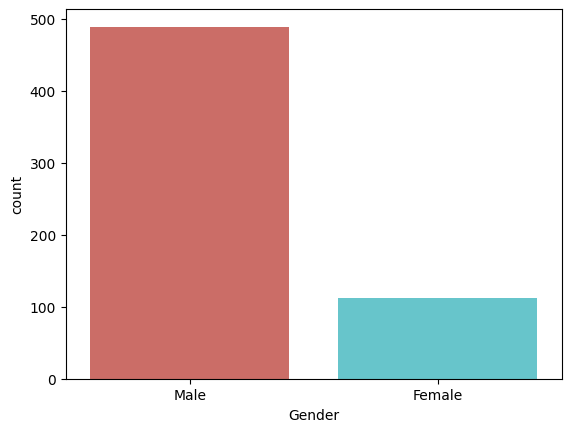

In [7]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [8]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


👉 From the results above, the number of male applicants is higher compared to female applicants. It also can be seen there are missing values in this column.

### 4.1.3 Married

In [9]:
df.Married.value_counts(dropna=False)

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

<ipython-input-10-98d68ac191b2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=df, palette="Paired")


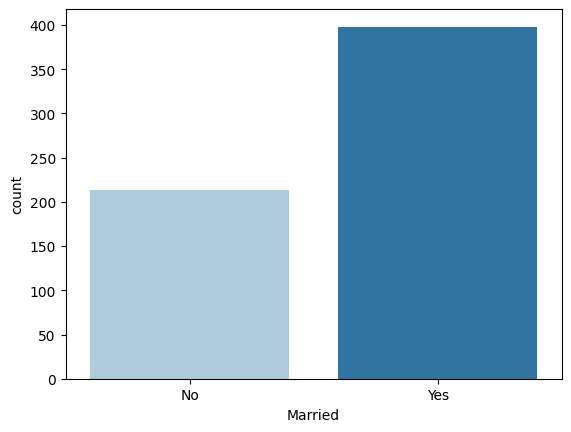

In [10]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

👉 The number of applicants that has been married is higher compared to applicants that hasn't married. It also can be seen there are small number of missing values in this column.

In [11]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


### 4.1.4 Education

In [12]:
df.Education.value_counts(dropna=False)

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

<ipython-input-13-8e9ea3c8e87a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="rocket")


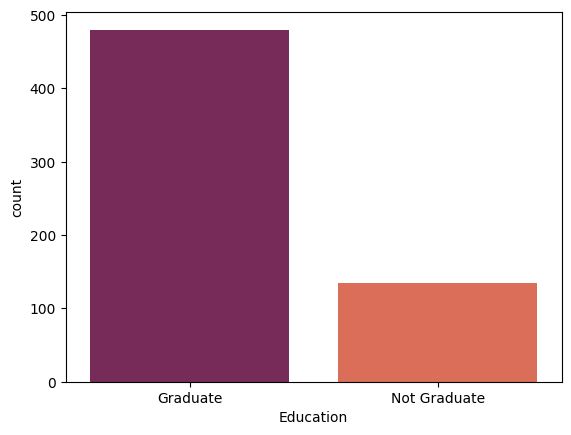

In [13]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [14]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


👉 The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

### 4.1.5 Self Employed

In [15]:
df.Self_Employed.value_counts(dropna=False)

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

<ipython-input-16-283837bf1c2e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="crest")


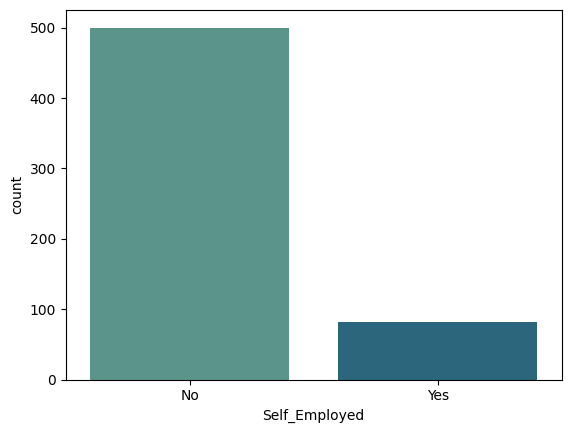

In [16]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [17]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


👉 The number of applicants that are not self employed is higher compared to applicants that are self employed. It also can be seen, there are missing values in this column.

### 4.1.6 Credit History

In [18]:
df.Credit_History.value_counts(dropna=False)

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

<ipython-input-19-b2abd7acd8ee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=df, palette="viridis")


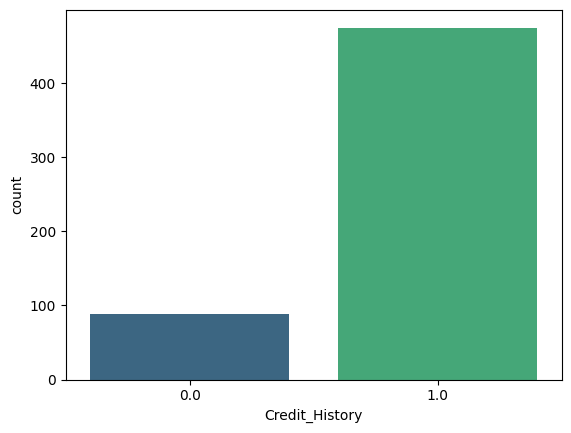

In [19]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [20]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


👉 The number of applicants that have good credit history is higher compared to applicants that have bad credit history. It also can be seen, there are missing values in this column.

### 4.1.7 Property Area

In [21]:
df.Property_Area.value_counts(dropna=False)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

<ipython-input-22-3f0e29f42635>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=df, palette="cubehelix")


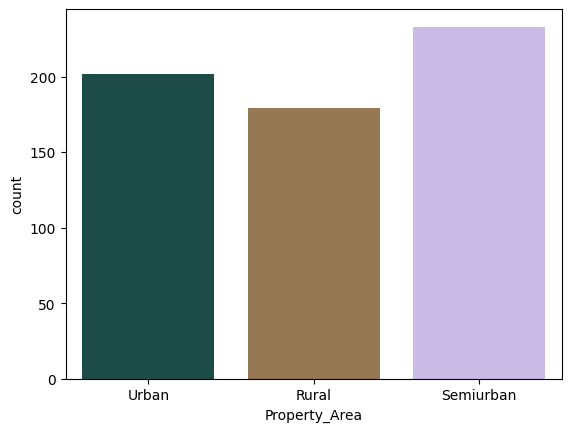

In [22]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [23]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


👉 This column has a balanced distribution between Urban, Rural, and Semiurban property area. It also can be seen there is no missing value.

### 4.1.8 Loan Status

In [24]:
df.Loan_Status.value_counts(dropna=False)

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<ipython-input-25-06b98ed0a451>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")


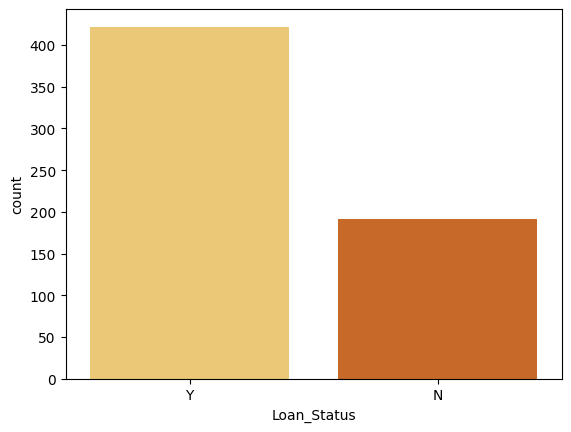

In [25]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [26]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


👉 The number of approved loans is higher compared to rejected loans . It also can be seen, there is no missing values in this column.

### 4.1.9 Loan Amount Term

In [27]:
df.Loan_Amount_Term.value_counts(dropna=False)

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

<ipython-input-28-88751c2297d5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")


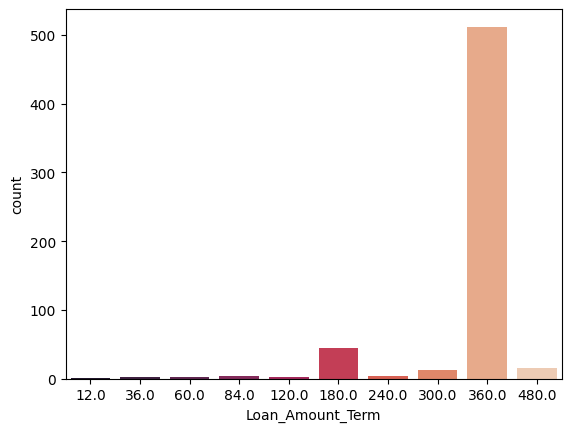

In [28]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [29]:
count12 = len(df[df.Loan_Amount_Term == 12.0])
count36 = len(df[df.Loan_Amount_Term == 36.0])
count60 = len(df[df.Loan_Amount_Term == 60.0])
count84 = len(df[df.Loan_Amount_Term == 84.0])
count120 = len(df[df.Loan_Amount_Term == 120.0])
count180 = len(df[df.Loan_Amount_Term == 180.0])
count240 = len(df[df.Loan_Amount_Term == 240.0])
count300 = len(df[df.Loan_Amount_Term == 300.0])
count360 = len(df[df.Loan_Amount_Term == 360.0])
count480 = len(df[df.Loan_Amount_Term == 480.0])
countNull = len(df[df.Loan_Amount_Term.isnull()])

print("Percentage of 12: {:.2f}%".format((count12 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(df.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(df.Loan_Amount_Term))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Percentage of 12: 0.16%
Percentage of 36: 0.33%
Percentage of 60: 0.33%
Percentage of 84: 0.65%
Percentage of 120: 0.49%
Percentage of 180: 7.17%
Percentage of 240: 0.65%
Percentage of 300: 2.12%
Percentage of 360: 83.39%
Percentage of 480: 2.44%
Missing values percentage: 2.28%


👉 As can be seen from the results, **the 360 days loan duration is the most popular** compared to others.

## 4.2 Numerical Variable 🔢
👉 The second variable that I will explore is categorical variable.

### 4.2.1 Describe Numerical Variable 🔎
👉 This section will show mean, count, std, min, max and others using describe function.


In [30]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


### 4.2.2 Distribution of Numerical Variable 📈
👉 In this section, I will show the distribution of numerical variable using histogram and violin plot.

#### 4.2.2.1 Histogram Distribution 📉

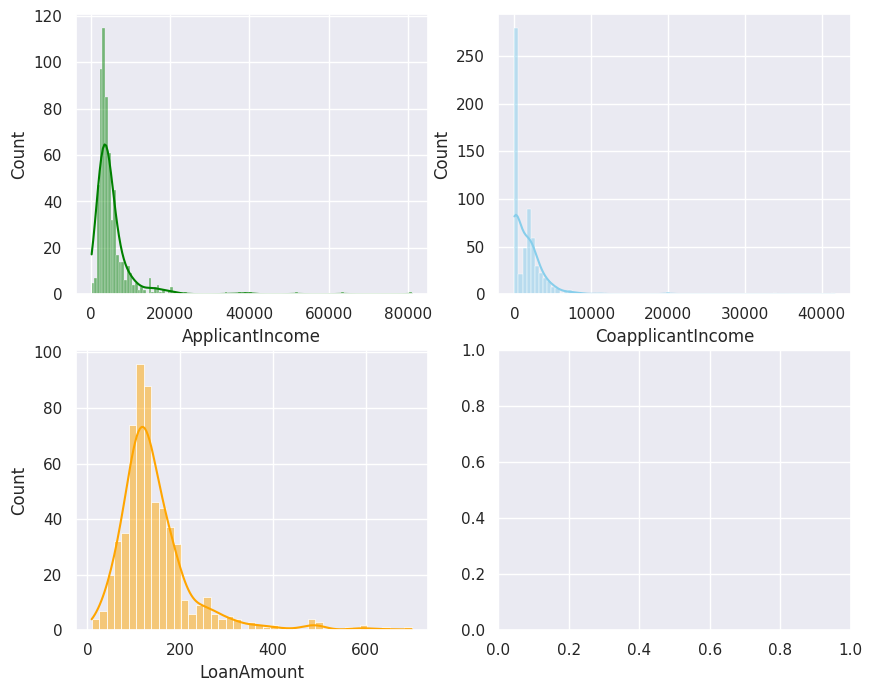

In [31]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

#### 4.2.2.2 Violin Plot 🎻

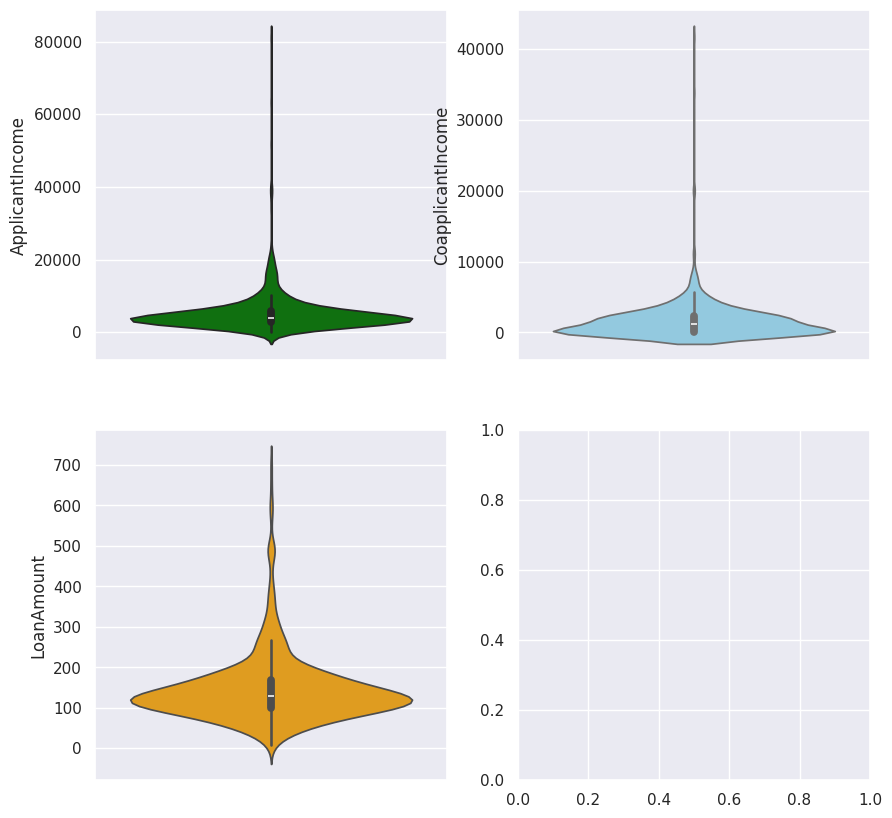

In [32]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

*   The distribution of **Applicant income, Co Applicant Income, and Loan Amount** are **positively skewed** and **it has outliers** (can be seen from both histogram and violin plot).
*   The distribution of **Loan Amount Term** is **negativly skewed** and **it has outliers.**



## 4.3 Other Exploration 💹
👉 This section will show additional exploration from each variables. The additional exploration are:
*   Bivariate analysis (categorical w/ categorical, categroical w/ numerical, and numerical w/ numerical)
*   Heatmap



### 4.3.1 Heatmap 🔥

In [33]:
# plt.figure(figsize=(10,7))
# sns.heatmap(df.corr(), annot=True, cmap='inferno');

👉 There is positive correlation between Loan Amount and Applicant Income

### 4.3.2 Categorical 📊 - Categorical 📊

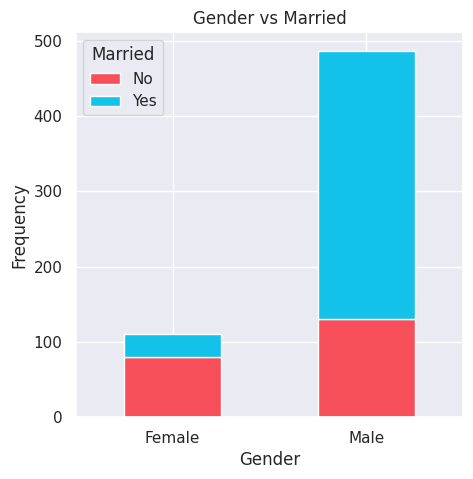

In [34]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

👉 Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

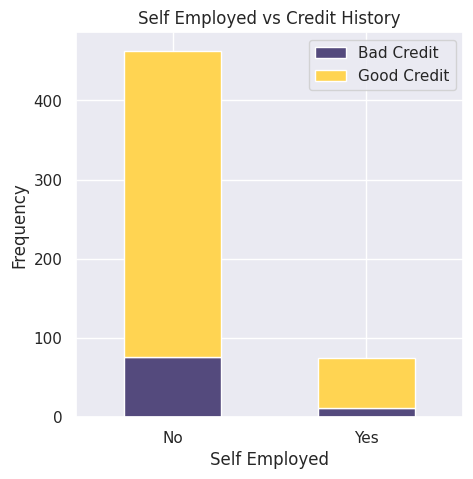

In [35]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

👉 Most not self employed applicants have good credit compared to self employed applicants.

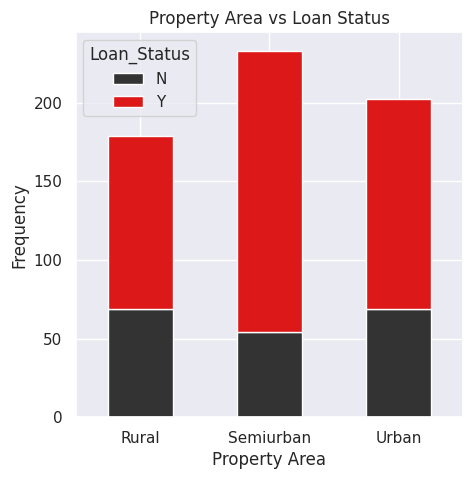

In [36]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

👉 Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

### 4.3.3 Categorical 📊- Numerical 📈

<ipython-input-37-0a4d7fb48f1f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");


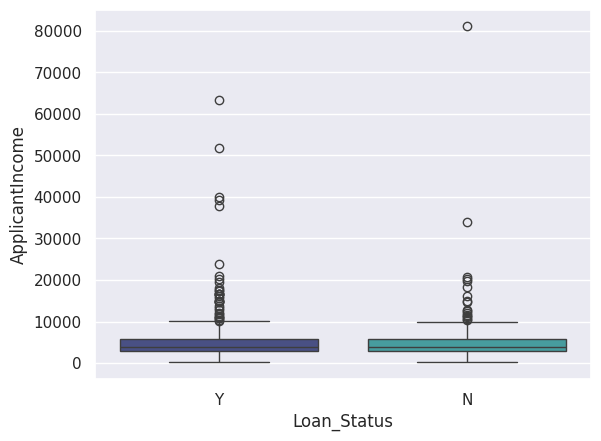

In [37]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette="mako");

👉 It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed

<ipython-input-38-e41ee8c4d05d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");


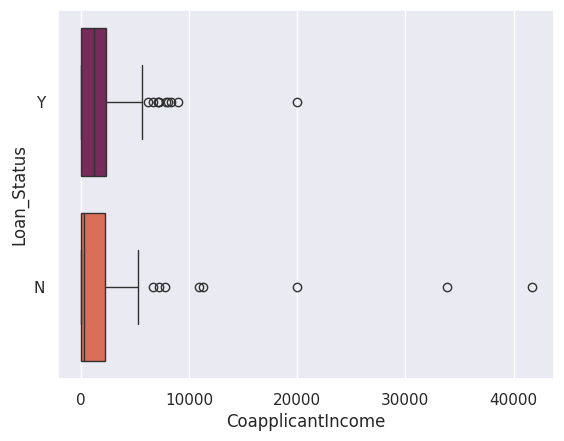

In [38]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df, palette="rocket");

👉 It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.

<ipython-input-39-7caa0fac4fb6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");


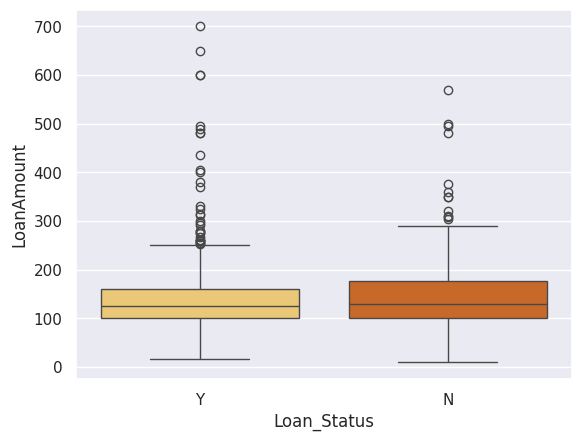

In [39]:
sns.boxplot(x="Loan_Status", y="LoanAmount", data=df, palette="YlOrBr");

👉 As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed.

### 4.3.4 Numerical 📈 - Numerical 📈

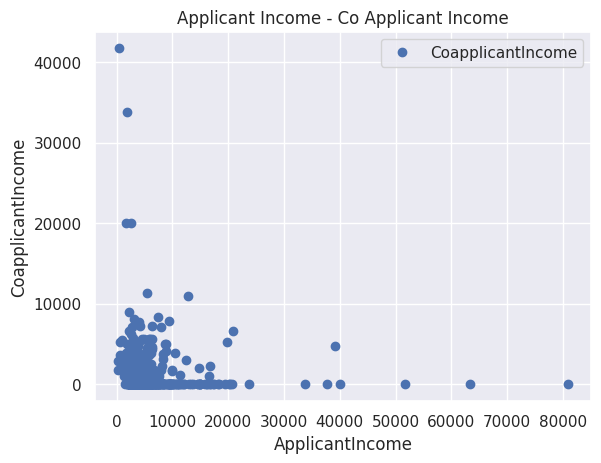

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)


In [40]:
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')
plt.title('Applicant Income - Co Applicant Income')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.show()
print('Pearson correlation:', df['ApplicantIncome'].corr(df['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome']))

*   There is **negative correlation** between Applicant income and Co Applicant Income.
*   The correlation coefficient is **significant** at the 95 per cent confidence interval, as it has a **p-value of 1.46**


## 4.4 Null Values 🚫

In [41]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

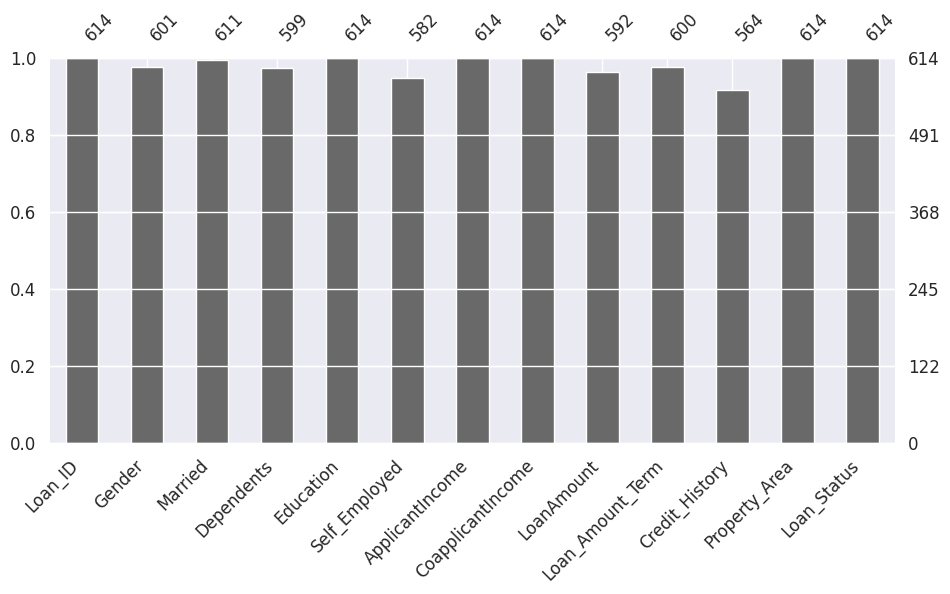

In [42]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12);

👉 Previously, the null values has been explored for Categorical Variables. In this section, the null values has been explored **for all variables** in the dataset.

# 5. Data Preprocessing ⚙

## 5.1 Drop Unecessary Variables 🔻
👉 Unecessary variables will be dropped in this section.

In [43]:
df = df.drop(['Loan_ID'], axis = 1)

## 5.2 Data Imputation 📝
👉 Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values.

### 5.2.1 Categorical Variables 📊
👉 In this section, the imputation for categorical variables will be performed using **mode**.

In [44]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

### 5.2.2 Numerical Variables 📈
👉 The next section is imputation for numerical variables using **mean**.

In [45]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

## 5.3 One-hot Encoding 🔧
👉 In this section, I will **transform categorical variables into a form that could be provided by ML algorithms to do a better prediction.**

In [46]:
df = pd.get_dummies(df)

# Drop columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

## 5.3 Remove Outliers & Infinite values 🚮
👉 Since there are outliers, **the outliers will be removed**. <br>


In [47]:

numeric_df = df.select_dtypes(include=[np.number])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define a condition for non-outliers
filter_condition = ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the condition to filter outliers
df = df[filter_condition]


## 5.4 Skewed Distribution Treatment 📐
👉 In previous section, it already shown that **distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed**. <br>
👉 I will use **square root transformation** to normalized the distribution.

In [48]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

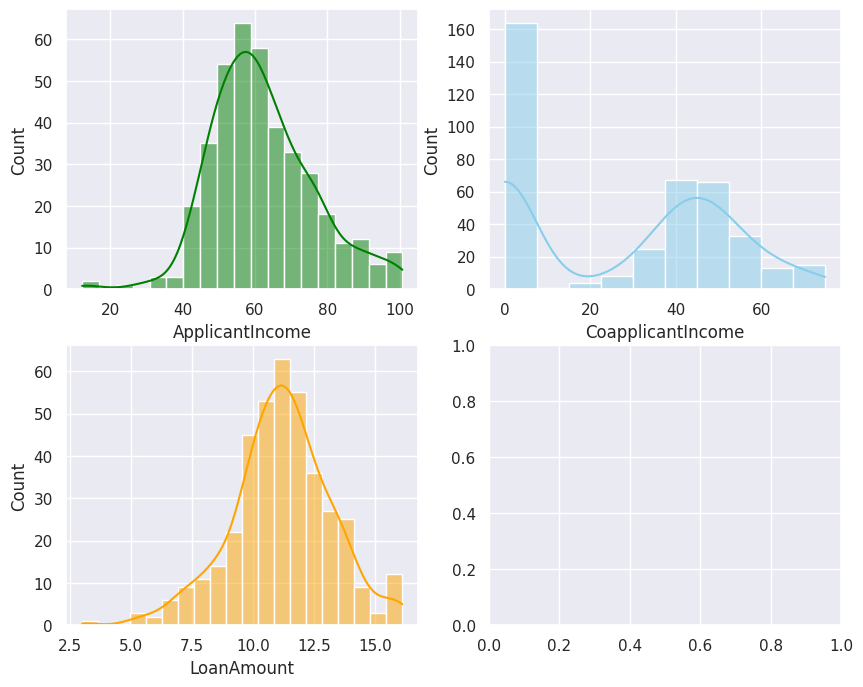

In [49]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

👉 As can be seen, the distribution after using log transformation are much better compared to original distribution.

## 5.5 Features Separating ➗
👉 Dependent features (Loan_Status) will be seperated from independent features.

In [50]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

## 5.6 SMOTE Technique 🔨
👉 In previous exploration, it can be seen that **the number between approved and rejected loan is imbalanced**. In this section, **oversampling technique will be used to avoid overfitting**,

In [51]:
X, y = SMOTE().fit_resample(X, y)

<ipython-input-52-464dc99333fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, palette="coolwarm")


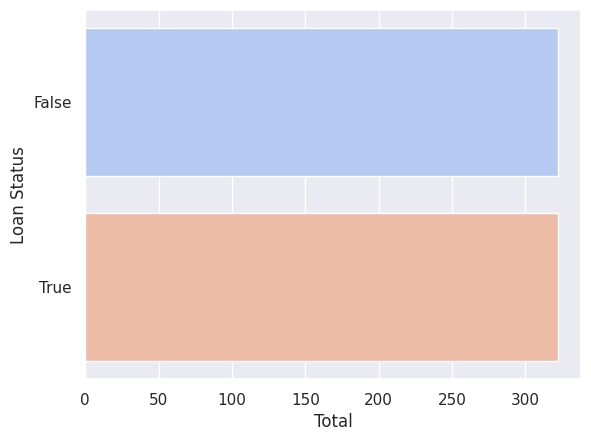

In [52]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

👉 As can be seen, the distrubtion of Loan status are now **balanced**.

## 5.7 Data Normalization ⚖
👉 In this section, data normalization will be performed **to normalize the range of independent variables or features of data**.

In [53]:
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled_array = scaler.fit_transform(X)

# Convert the numpy array back to a pandas DataFrame, including the original column names and index
X = pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)

## 5.8 Splitting Data Set 🪓
👉 The data set will be split into **80% train and 20% test**.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 6. Models 🛠

## 6.1 Logistic Regression

In [55]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       False       0.96      0.67      0.79        67
        True       0.73      0.97      0.83        62

    accuracy                           0.81       129
   macro avg       0.84      0.82      0.81       129
weighted avg       0.85      0.81      0.81       129

[[45 22]
 [ 2 60]]
LR accuracy: 81.40%


## 6.2 K-Nearest Neighbour (KNN)

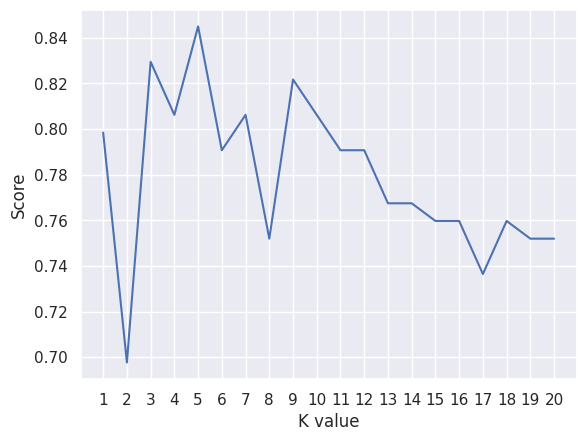

KNN best accuracy: 84.50%


In [56]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## 6.3 Support Vector Machine (SVM)

In [57]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       False       0.98      0.66      0.79        67
        True       0.73      0.98      0.84        62

    accuracy                           0.81       129
   macro avg       0.85      0.82      0.81       129
weighted avg       0.86      0.81      0.81       129

[[44 23]
 [ 1 61]]
SVC accuracy: 81.40%


## 6.4 Naive Bayes

### 6.4.1 Categorical NB

In [60]:
# NBclassifier1 = CategoricalNB()
# NBclassifier1.fit(X_train, y_train)

# y_pred = NBclassifier1.predict(X_test)

# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))

# from sklearn.metrics import accuracy_score
# NBAcc1 = accuracy_score(y_pred,y_test)
# print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBAcc1*100))

### 6.4.2 Gaussian NB

In [61]:
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       False       0.62      0.67      0.65        67
        True       0.61      0.56      0.59        62

    accuracy                           0.62       129
   macro avg       0.62      0.62      0.62       129
weighted avg       0.62      0.62      0.62       129

[[45 22]
 [27 35]]
Gaussian Naive Bayes accuracy: 62.02%


## 6.5 Decision Tree

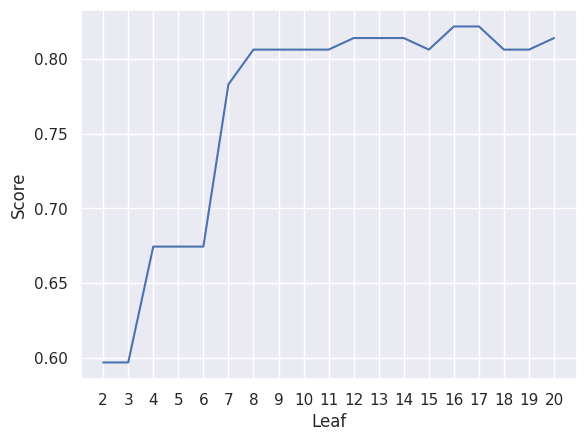

Decision Tree Accuracy: 82.17%


In [62]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## 6.6 Random Forest

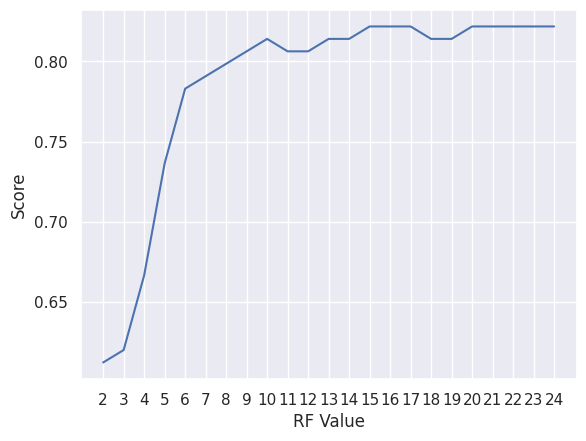

Random Forest Accuracy:  82.17%


In [63]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## 6.7 Gradient Boosting

In [64]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [65]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [66]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=5, max_leaf_nodes=40, n_estimators=400,
                           subsample=1)
0.8346923076923076
{'subsample': 1, 'n_estimators': 400, 'max_leaf_nodes': 40, 'max_depth': 5}
3


In [67]:
GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

       False       0.83      0.85      0.84        67
        True       0.83      0.81      0.82        62

    accuracy                           0.83       129
   macro avg       0.83      0.83      0.83       129
weighted avg       0.83      0.83      0.83       129

[[57 10]
 [12 50]]
Gradient Boosting accuracy: 82.95%


# 7. Model Comparison 👀

In [68]:
# compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
#                                   'SVM', 'Categorical NB',
#                                   'Gaussian NB', 'Decision Tree',
#                                   'Random Forest', 'Gradient Boost'],
#                         'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100,
#                                      NBAcc1*100, NBAcc2*100, DTAcc*100,
#                                      RFAcc*100, GBAcc*100]})
# compare.sort_values(by='Accuracy', ascending=False)


# Without categorical NB
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors',
                                  'SVM',
                                  'Gaussian NB', 'Decision Tree',
                                  'Random Forest', 'Gradient Boost'],
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100,
                                      NBAcc2*100, DTAcc*100,
                                     RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,K Neighbors,84.496124
6,Gradient Boost,82.945736
4,Decision Tree,82.170543
5,Random Forest,82.170543
0,Logistic Regression,81.395349
2,SVM,81.395349
3,Gaussian NB,62.015504


👉 In general, it can be seen that **all models can achieve up to 70% accuracy**. <br>
👉 The highest accuracy is **93%%**. <br><br>
👉 If you have any suggestions to **improve** these models, we can *discuss in the comments* :).

---

**Like this notebook? You can support me by giving upvote** 😆👍🔼 <br>
👉 *More about myself: [linktr.ee/caesarmario_](http://linktr.ee/caesarmario_)*<br><br>
#### 🎈 Check out my work on GitHub using similar data sets with SAS studio [here](https://github.com/caesarmario/loan-prediction-SAS-studio).

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
!pip install fairlearn
# !pip install fairlearn.adversarial
from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.preprocessing import CorrelationRemover
# from fairlearn.adversarial import AdversarialFairnessClassifier
from fairlearn.metrics import MetricFrame
import fairlearn.datasets as fdata
from fairlearn.metrics import (demographic_parity_difference, demographic_parity_ratio,
                               selection_rate_difference, false_negative_rate_difference,
                               false_positive_rate_difference, equalized_odds_ratio,
                               false_negative_rate, false_positive_rate)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 4.5 MB/s eta 0:00:00


In [70]:
from fairlearn.metrics import MetricFrame, false_negative_rate, false_positive_rate, demographic_parity_difference, equalized_odds_difference
from sklearn.metrics import accuracy_score, precision_score, recall_score
from fairlearn.metrics import selection_rate


In [71]:
import os
import shutil
from fairlearn.metrics import MetricFrame, selection_rate, false_positive_rate, true_positive_rate
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd

# Create directories for saving the results
os.makedirs('metrics_by_group', exist_ok=True)
os.makedirs('metrics_overall', exist_ok=True)
os.makedirs('metrics_disparity', exist_ok=True)

# List of models to iterate over
models = [
    ('LogisticRegression', LRclassifier),
    ('KNeighborsClassifier', KNclassifier),
    ('SVC', SVCclassifier),
    ('GaussianNB', NBclassifier2),
    ('DecisionTreeClassifier', DTclassifier),
    ('RandomForestClassifier', RFclassifier),
    ('GradientBoostingClassifier', GBclassifier)
]

sensitive_features = X_test[['Gender', 'Married']]

# Define the metrics dictionary
metrics_dict = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'selection_rate': selection_rate,
    'false_positive_rate': false_positive_rate,
    'false_negative_rate': false_negative_rate
}

# Iterate over each model, compute MetricFrame, and save results to CSV
for model_name, model in models:
    # Ensure the model is trained (this assumes the models are already trained)
    if not hasattr(model, 'predict'):
        model.fit(X_train, y_train)

    # Calculate MetricFrame
    mf = MetricFrame(
        metrics=metrics_dict,
        y_true=y_test,
        y_pred=model.predict(X_test),
        sensitive_features=sensitive_features
    )

    # Output the model name
    print(model_name)
    print("Metrics by group:")
    print(mf.by_group)
    print()

    # Save the by_group results to a CSV file
    by_group_filename = f"metrics_by_group/{model_name}_mf_bygroup.csv"
    mf.by_group.to_csv(by_group_filename, index=True)
    print(f"Metrics by group for {model_name} saved to {by_group_filename}")

    print("\nOverall metrics:")
    print(mf.overall)

    # Save the overall results to a CSV file
    overall_filename = f"metrics_overall/{model_name}_mf_overall.csv"
    mf.overall.to_csv(overall_filename, header=True)
    print(f"Overall metrics for {model_name} saved to {overall_filename}")
    print()

    # Calculate and print disparity metrics
    disparity_difference = mf.difference(method='between_groups')
    disparity_ratio = mf.ratio(method='between_groups')

    print("\nDisparity in metrics:")
    print(disparity_difference)
    print(disparity_ratio)
    print()

    # Save disparity metrics to a CSV file
    disparity_df = pd.DataFrame({
        'difference': disparity_difference,
        'ratio': disparity_ratio
    })
    disparity_filename = f"metrics_disparity/{model_name}_mf_disparity.csv"
    disparity_df.to_csv(disparity_filename, index=True)
    print(f"Disparity metrics for {model_name} saved to {disparity_filename}")
    print()

# Zip the directories
shutil.make_archive('metrics_by_group', 'zip', 'metrics_by_group')
shutil.make_archive('metrics_overall', 'zip', 'metrics_overall')
shutil.make_archive('metrics_disparity', 'zip', 'metrics_disparity')

print("Zipped the directories successfully!")

# Provide links to download the zipped directories
from google.colab import files
print("Downloading the ZIP files...")
files.download('metrics_by_group.zip')
files.download('metrics_overall.zip')
files.download('metrics_disparity.zip')


LogisticRegression
Metrics by group:
                accuracy  precision    recall  selection_rate  \
Gender Married                                                  
0.0    0.0      0.818182   0.800000  1.000000        0.909091   
       1.0      0.500000   0.500000  1.000000        1.000000   
1.0    0.0      0.615385   0.571429  0.923077        0.807692   
       1.0      0.886364   0.808511  0.974359        0.534091   

                false_positive_rate  false_negative_rate  
Gender Married                                            
0.0    0.0                 0.666667             0.000000  
       1.0                 1.000000             0.000000  
1.0    0.0                 0.692308             0.076923  
       1.0                 0.183673             0.025641  

Metrics by group for LogisticRegression saved to metrics_by_group/LogisticRegression_mf_bygroup.csv

Overall metrics:
accuracy               0.813953
precision              0.731707
recall                 0.967742
sel

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
overall_original = pd.read_csv("/content/rf_overall_original.csv")
overall_corrected = pd.read_csv("/content/rf_overall_corrected.csv")
overall_edited = pd.read_csv("/content/rf_overall_no_impute.csv")

In [73]:
overall_original

,Unnamed: 0,0
0,accuracy,0.837209
1,precision,0.815385
2,recall,0.854839
3,selection_rate,0.503876
4,false_positive_rate,0.179104
5,false_negative_rate,0.145161


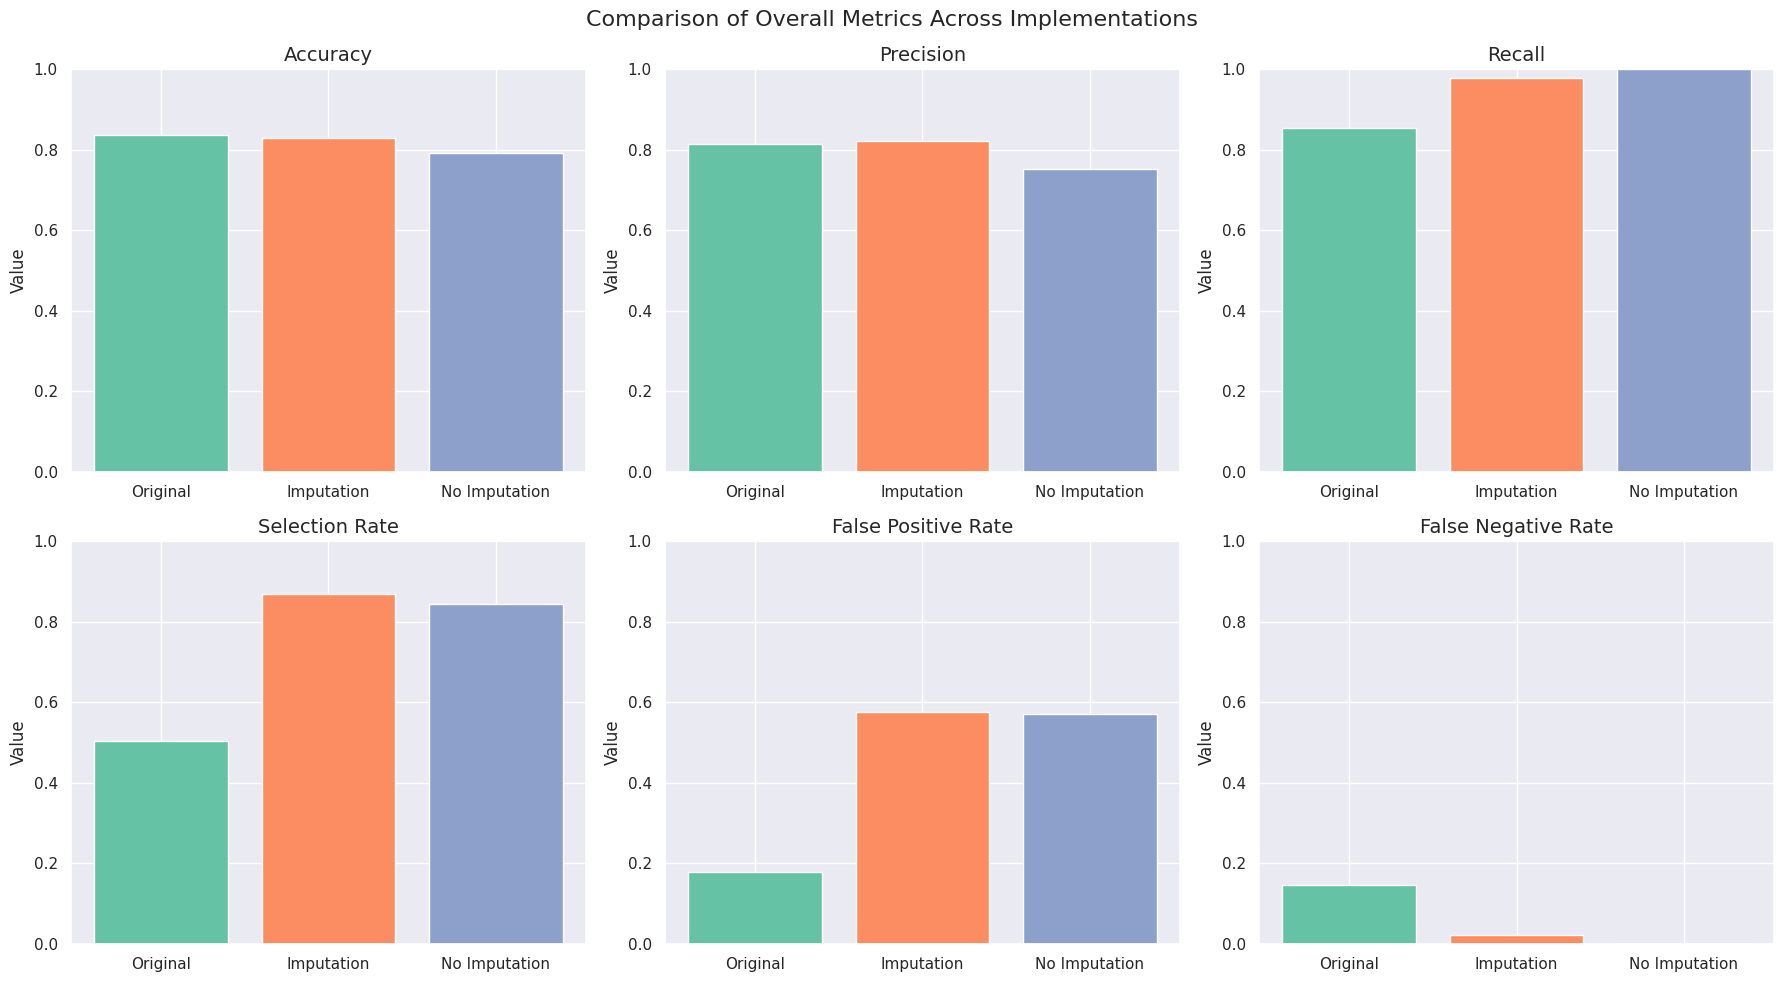

In [74]:
metrics = ["accuracy", "precision", "recall", "selection_rate", "false_positive_rate", "false_negative_rate"]

colors = sns.color_palette("Set2", n_colors=3)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    # Extract values for the metric
    original_value = overall_original.loc[overall_original['Unnamed: 0'] == metric, '0'].values[0]
    corrected_value = overall_corrected.loc[overall_corrected['Unnamed: 0'] == metric, '0'].values[0]
    edited_value = overall_edited.loc[overall_edited['Unnamed: 0'] == metric, '0'].values[0]

    # Create the bar plot with Seaborn color palette
    ax.bar(['Original', 'Imputation', 'No Imputation'], [original_value, corrected_value, edited_value], color=colors)

    # Set title and labels
    ax.set_title(metric.replace('_', ' ').title(), fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_ylim(0, 1)  # Assuming all metrics are between 0 and 1 for consistency


fig.suptitle('Comparison of Overall Metrics Across Implementations', fontsize=16)


# Adjust layout

plt.tight_layout()
plt.show()

In [75]:
group_original = pd.read_csv("/content/rf_group_original.csv")
group_corrected = pd.read_csv("/content/rf_group_corrected.csv")
group_edited = pd.read_csv("/content/rf_group_no_impute.csv")

In [76]:
group_original

,Gender,Married,accuracy,precision,recall,selection_rate,false_positive_rate,false_negative_rate
0,0.0,0.0,0.666667,0.750000,0.750000,0.666667,0.500000,0.250000
1,0.0,1.0,0.800000,0.666667,1.000000,0.600000,0.333333,0.000000
2,1.0,0.0,0.774194,0.666667,0.923077,0.580645,0.333333,0.076923
3,1.0,1.0,0.888889,0.916667,0.846154,0.444444,0.071429,0.153846


In [77]:
group_corrected

,Gender,Married,accuracy,precision,recall,selection_rate,false_positive_rate,false_negative_rate
0,0.0,0.0,0.705882,0.692308,0.900000,0.764706,0.571429,0.100000
1,0.0,1.0,1.000000,1.000000,1.000000,0.600000,0.000000,0.000000
2,1.0,0.0,0.709677,0.689655,1.000000,0.935484,0.818182,0.000000
3,1.0,1.0,0.900000,0.903226,0.982456,0.885714,0.461538,0.017544


In [78]:
group_edited

,Gender,Married,accuracy,precision,recall,selection_rate,false_positive_rate,false_negative_rate
0,0.0,0.0,0.615385,0.545455,1.0,0.846154,0.714286,0.0
1,0.0,1.0,1.000000,1.000000,1.0,1.000000,0.000000,0.0
2,1.0,0.0,0.937500,0.923077,1.0,0.812500,0.250000,0.0
3,1.0,1.0,0.777778,0.735849,1.0,0.841270,0.583333,0.0


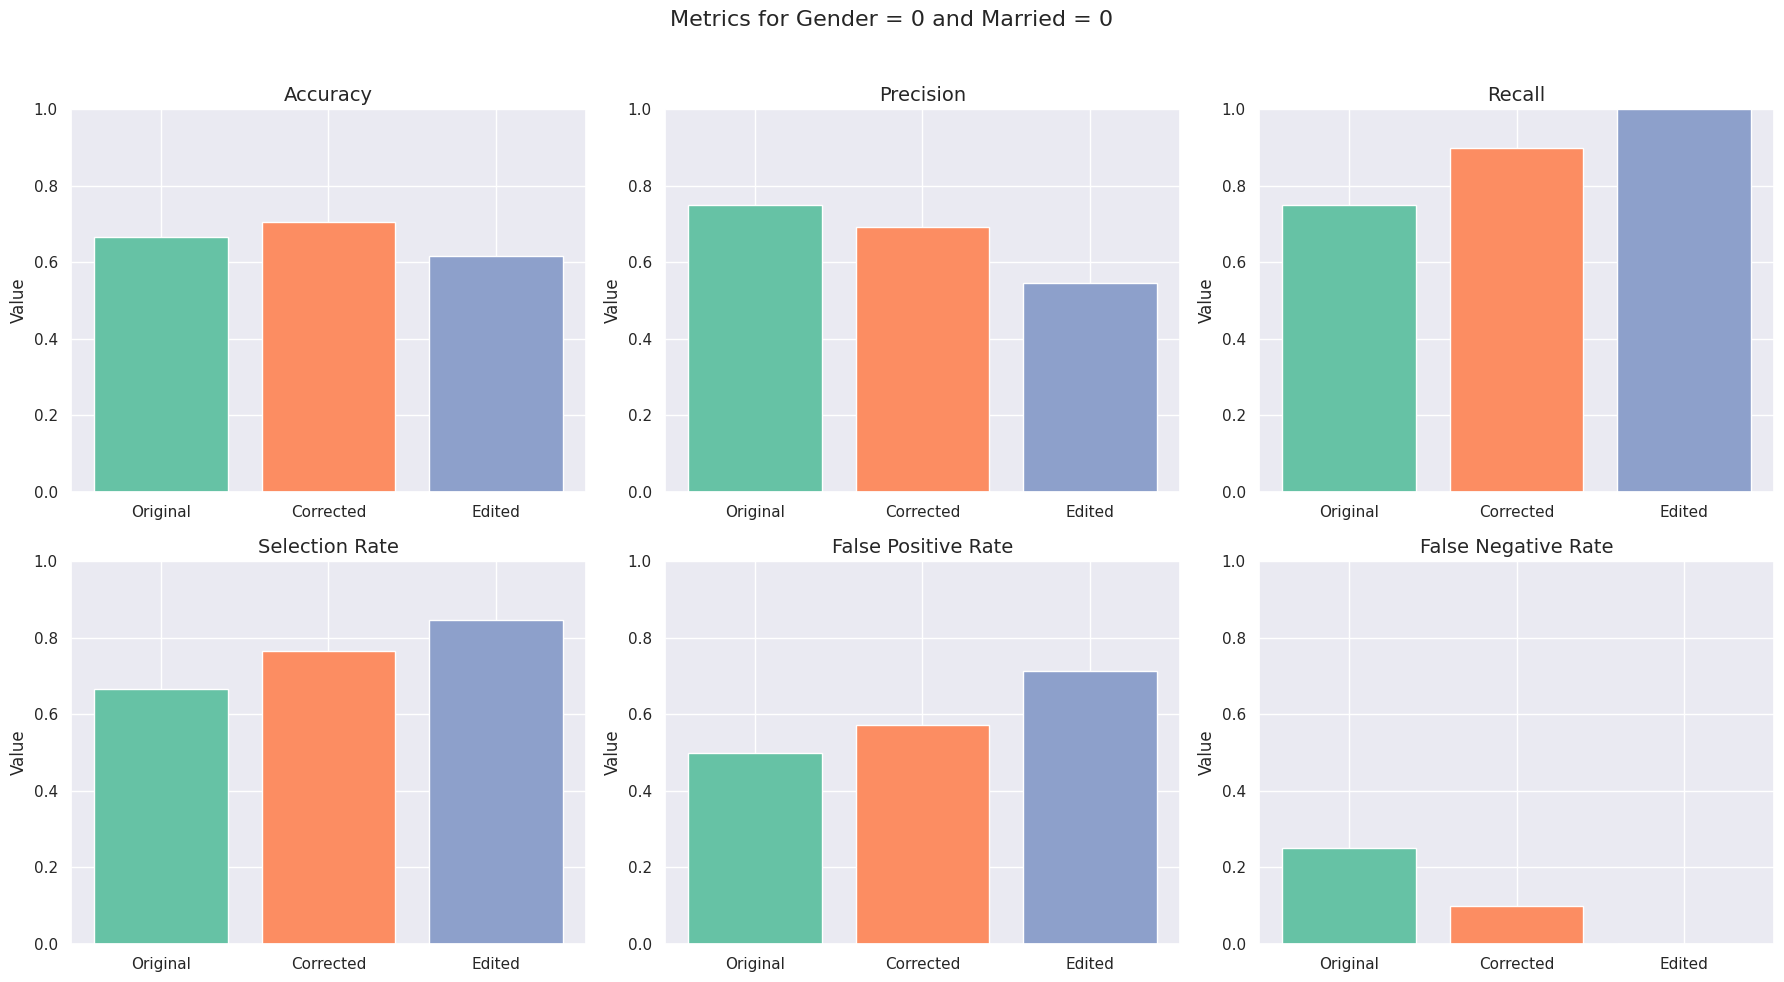

In [79]:
# Filter the rows where Gender = 0 and Married = 0
original_values = group_original[(group_original['Gender'] == 0) & (group_original['Married'] == 0)]
corrected_values = group_corrected[(group_corrected['Gender'] == 0) & (group_corrected['Married'] == 0)]
edited_values = group_edited[(group_edited['Gender'] == 0) & (group_edited['Married'] == 0)]

# Set the metric names
metrics = ["accuracy", "precision", "recall", "selection_rate", "false_positive_rate", "false_negative_rate"]

# Define a more aesthetically pleasing color palette
colors = sns.color_palette("Set2", n_colors=3)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    # Extract values for the metric
    original_value = original_values[metric].values[0]
    corrected_value = corrected_values[metric].values[0]
    edited_value = edited_values[metric].values[0]

    # Create the bar plot with Seaborn color palette
    ax.bar(['Original', 'Corrected', 'Edited'], [original_value, corrected_value, edited_value], color=colors)

    # Set title and labels
    ax.set_title(metric.replace('_', ' ').title(), fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_ylim(0, 1)  # Assuming all metrics are between 0 and 1 for consistency

# Set the main title for the entire figure
fig.suptitle('Metrics for Gender = 0 and Married = 0', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()

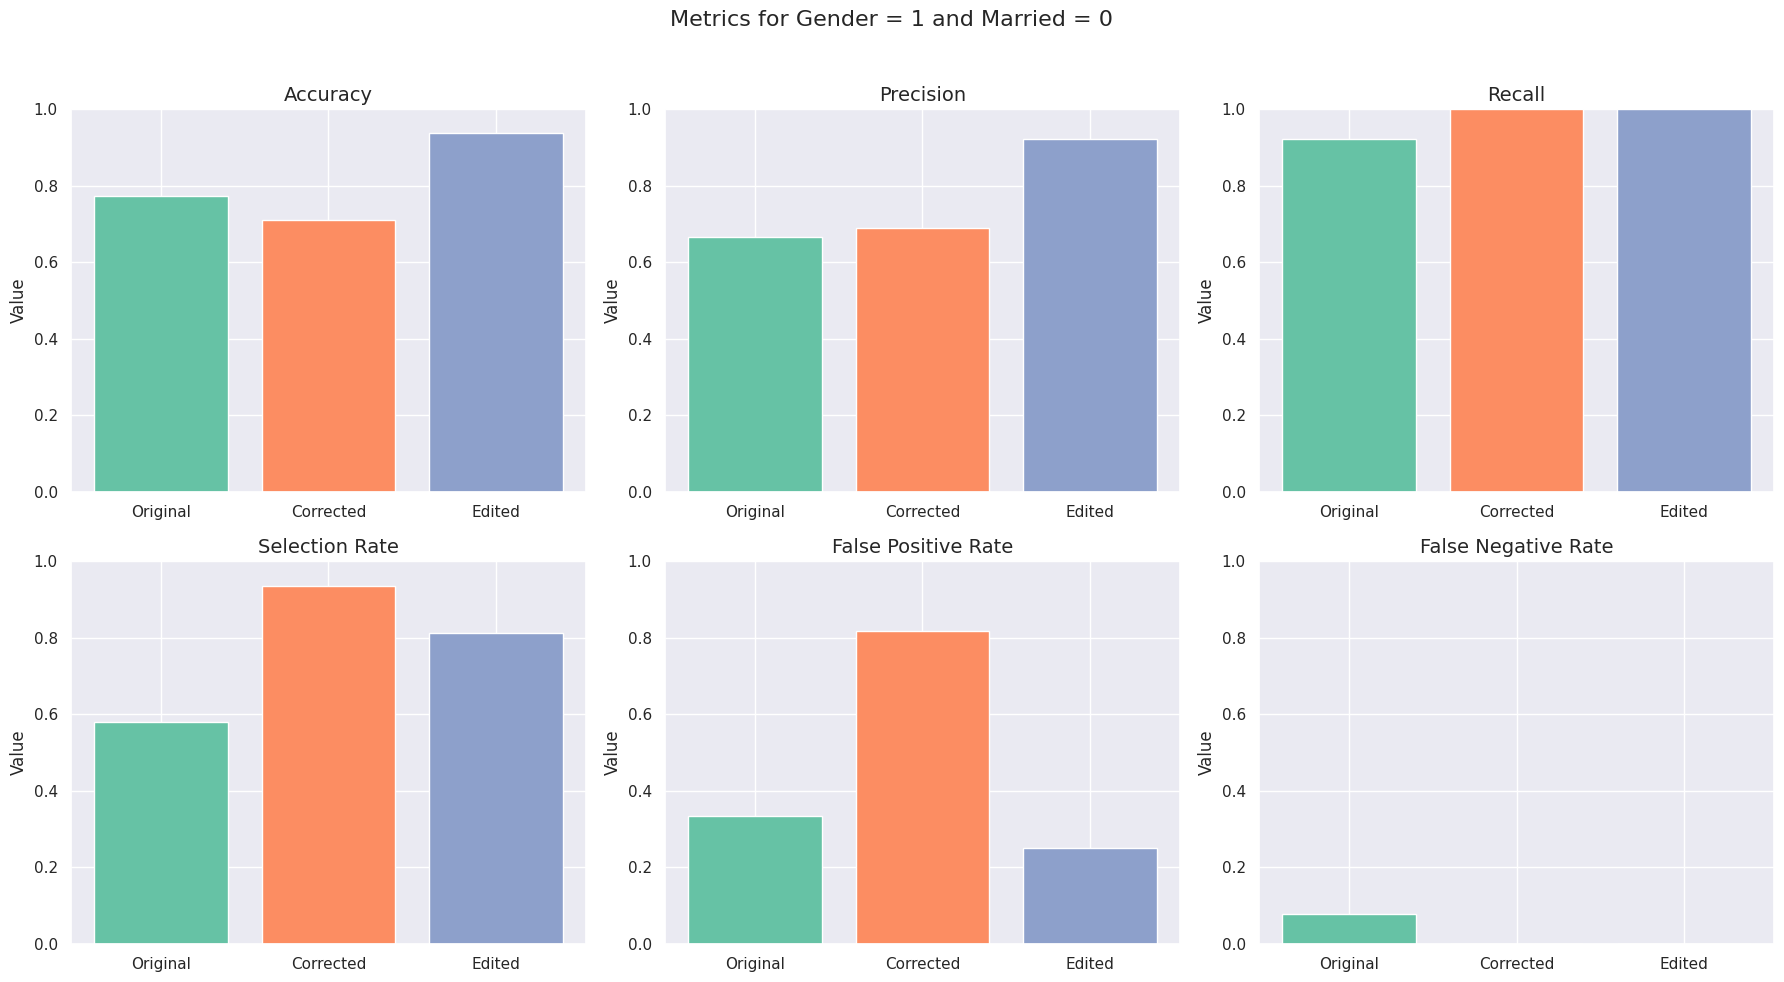

In [80]:
# Filter the rows where Gender = 1 and Married = 0
original_values = group_original[(group_original['Gender'] == 1) & (group_original['Married'] == 0)]
corrected_values = group_corrected[(group_corrected['Gender'] == 1) & (group_corrected['Married'] == 0)]
edited_values = group_edited[(group_edited['Gender'] == 1) & (group_edited['Married'] == 0)]

# Set the metric names
metrics = ["accuracy", "precision", "recall", "selection_rate", "false_positive_rate", "false_negative_rate"]

# Define a more aesthetically pleasing color palette
colors = sns.color_palette("Set2", n_colors=3)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    # Extract values for the metric
    original_value = original_values[metric].values[0]
    corrected_value = corrected_values[metric].values[0]
    edited_value = edited_values[metric].values[0]

    # Create the bar plot with Seaborn color palette
    ax.bar(['Original', 'Corrected', 'Edited'], [original_value, corrected_value, edited_value], color=colors)

    # Set title and labels
    ax.set_title(metric.replace('_', ' ').title(), fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_ylim(0, 1)  # Assuming all metrics are between 0 and 1 for consistency

# Set the main title for the entire figure
fig.suptitle('Metrics for Gender = 1 and Married = 0', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()

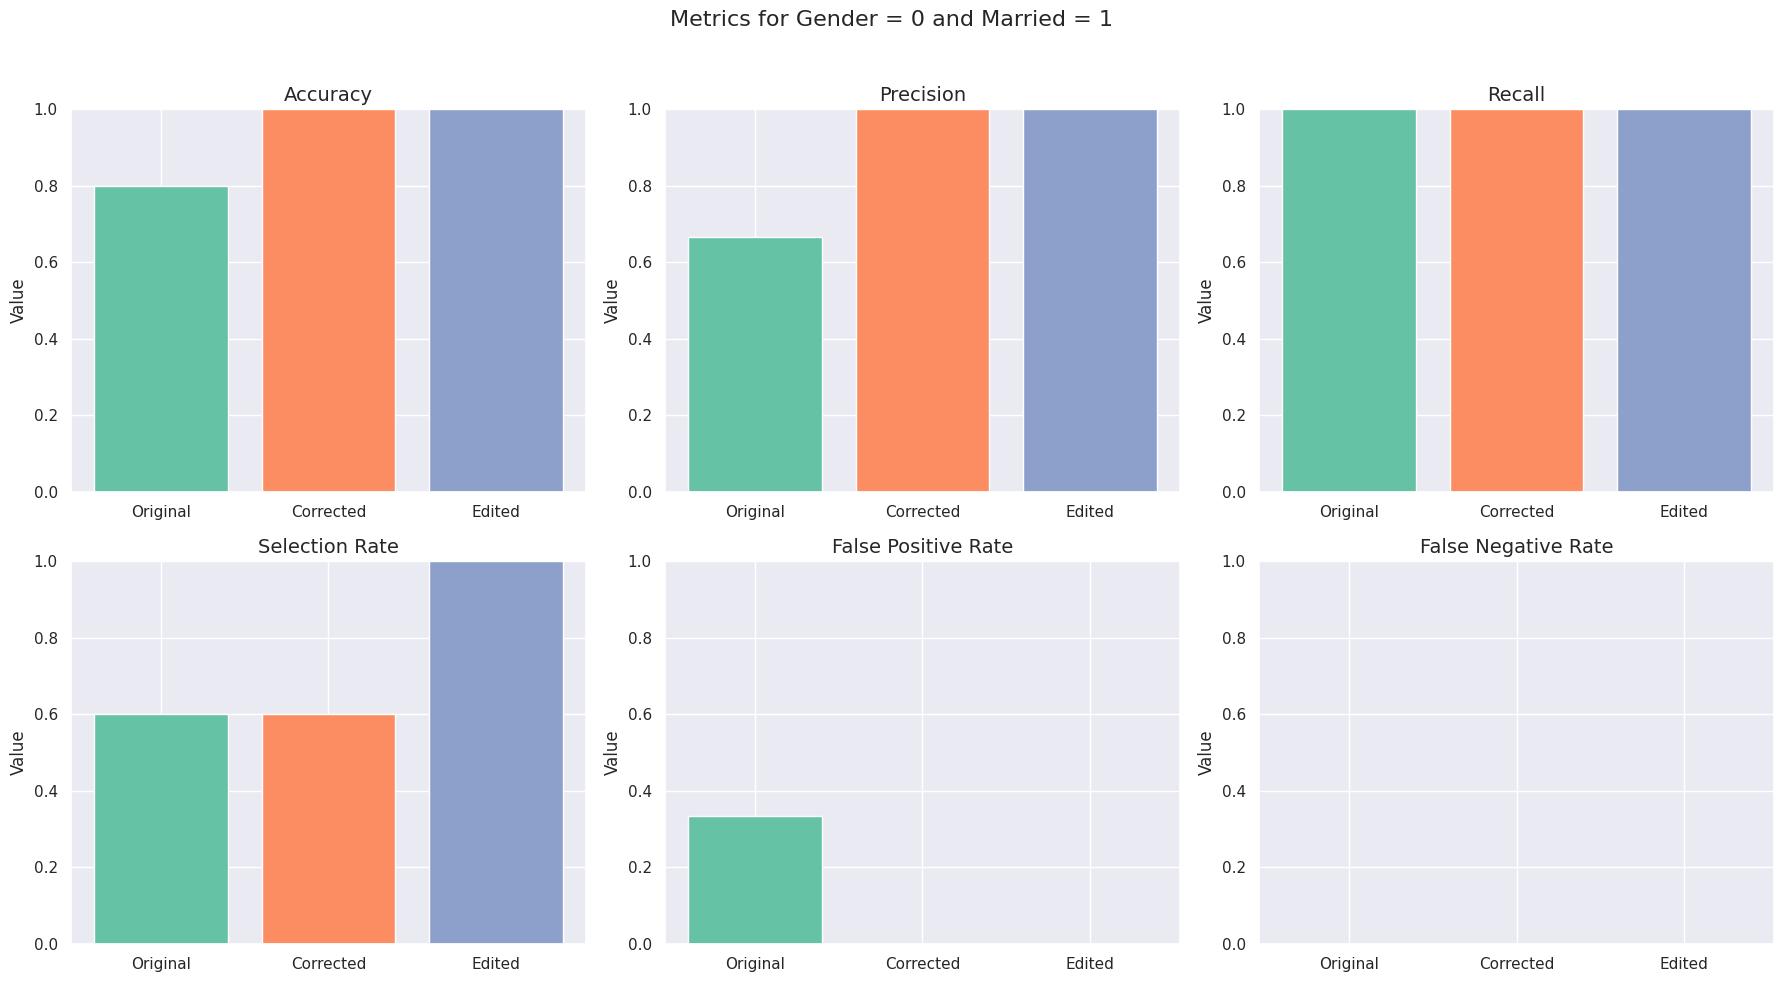

In [81]:
# Filter the rows where Gender = 0 and Married = 1
original_values = group_original[(group_original['Gender'] == 0) & (group_original['Married'] == 1)]
corrected_values = group_corrected[(group_corrected['Gender'] == 0) & (group_corrected['Married'] == 1)]
edited_values = group_edited[(group_edited['Gender'] == 0) & (group_edited['Married'] == 1)]

# Set the metric names
metrics = ["accuracy", "precision", "recall", "selection_rate", "false_positive_rate", "false_negative_rate"]

# Define a more aesthetically pleasing color palette
colors = sns.color_palette("Set2", n_colors=3)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    # Extract values for the metric
    original_value = original_values[metric].values[0]
    corrected_value = corrected_values[metric].values[0]
    edited_value = edited_values[metric].values[0]

    # Create the bar plot with Seaborn color palette
    ax.bar(['Original', 'Corrected', 'Edited'], [original_value, corrected_value, edited_value], color=colors)

    # Set title and labels
    ax.set_title(metric.replace('_', ' ').title(), fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_ylim(0, 1)  # Assuming all metrics are between 0 and 1 for consistency

# Set the main title for the entire figure
fig.suptitle('Metrics for Gender = 0 and Married = 1', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()

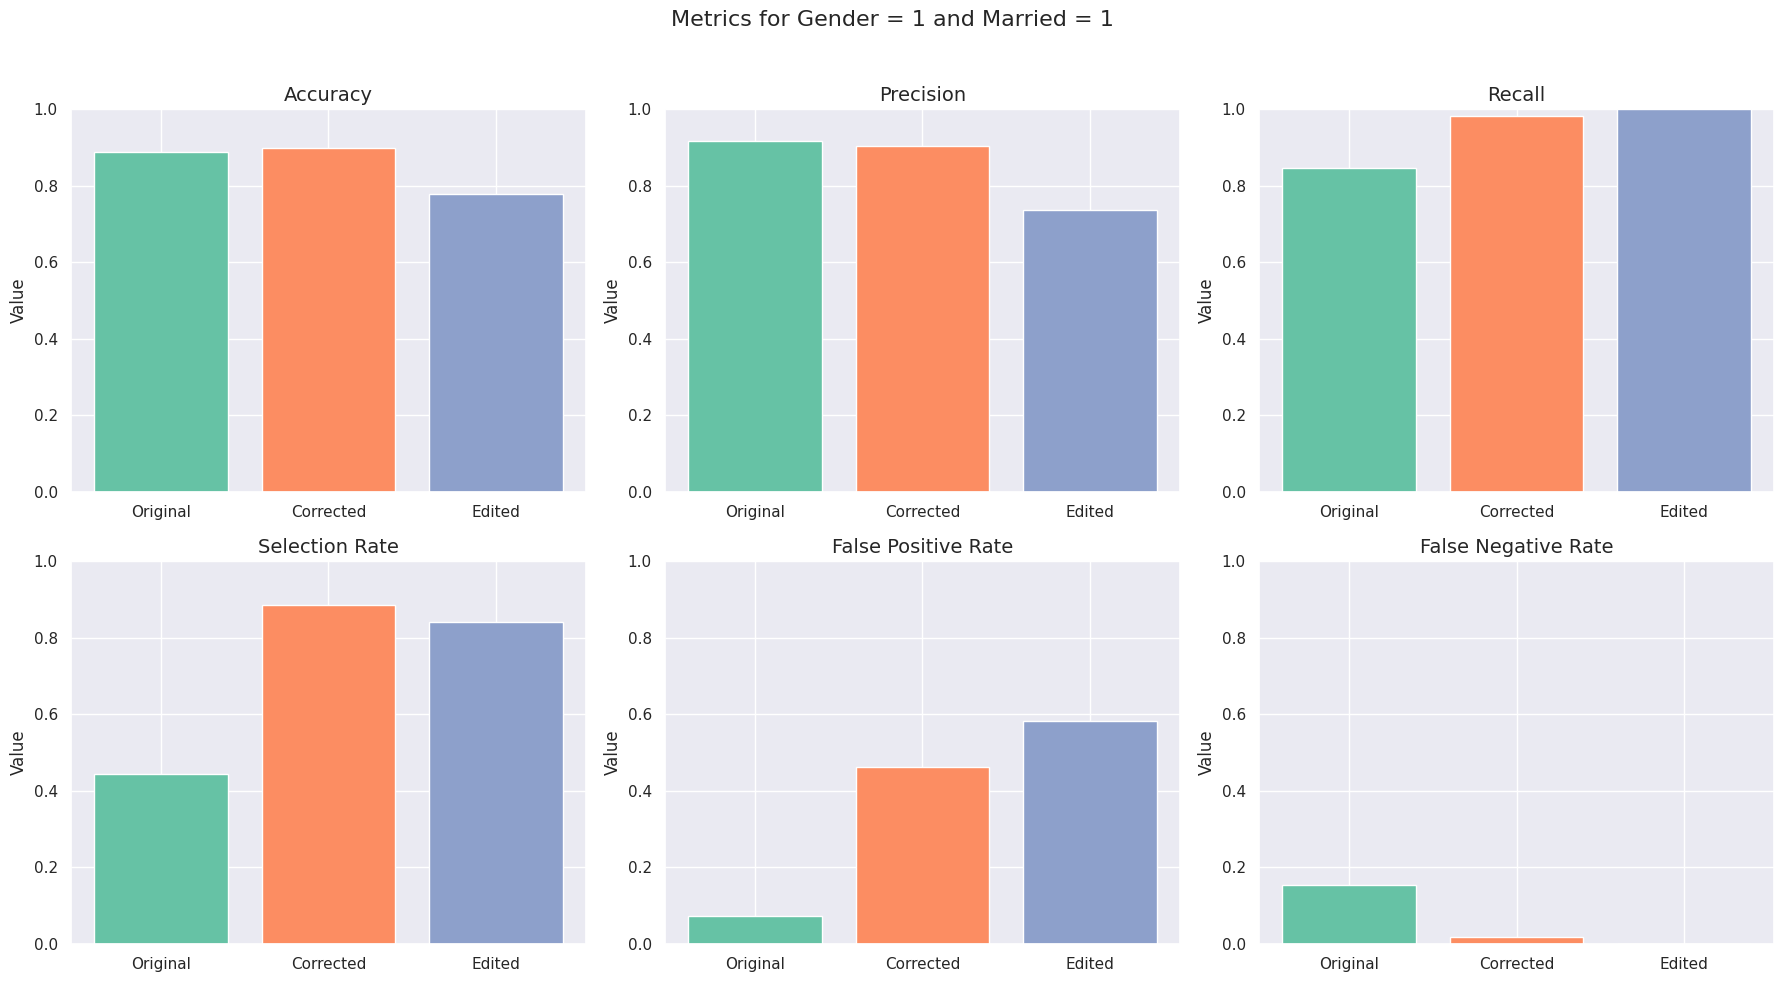

In [82]:
# Filter the rows where Gender = 1 and Married = 1
original_values = group_original[(group_original['Gender'] == 1) & (group_original['Married'] == 1)]
corrected_values = group_corrected[(group_corrected['Gender'] == 1) & (group_corrected['Married'] == 1)]
edited_values = group_edited[(group_edited['Gender'] == 1) & (group_edited['Married'] == 1)]

# Set the metric names
metrics = ["accuracy", "precision", "recall", "selection_rate", "false_positive_rate", "false_negative_rate"]

# Define a more aesthetically pleasing color palette
colors = sns.color_palette("Set2", n_colors=3)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    # Extract values for the metric
    original_value = original_values[metric].values[0]
    corrected_value = corrected_values[metric].values[0]
    edited_value = edited_values[metric].values[0]

    # Create the bar plot with Seaborn color palette
    ax.bar(['Original', 'Corrected', 'Edited'], [original_value, corrected_value, edited_value], color=colors)

    # Set title and labels
    ax.set_title(metric.replace('_', ' ').title(), fontsize=14)
    ax.set_ylabel('Value', fontsize=12)
    ax.set_ylim(0, 1)  # Assuming all metrics are between 0 and 1 for consistency

# Set the main title for the entire figure
fig.suptitle('Metrics for Gender = 1 and Married = 1', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()